# Grouped Bar Plots

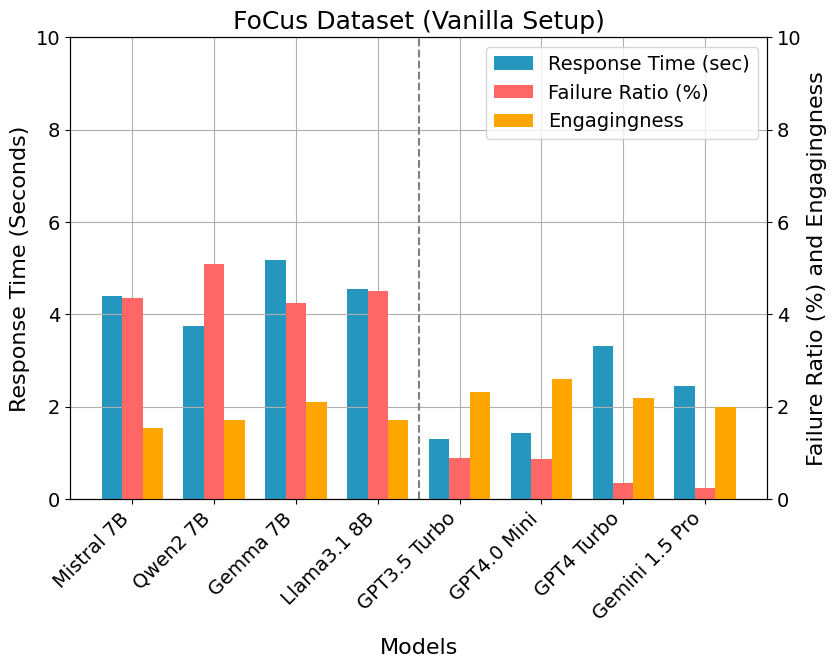

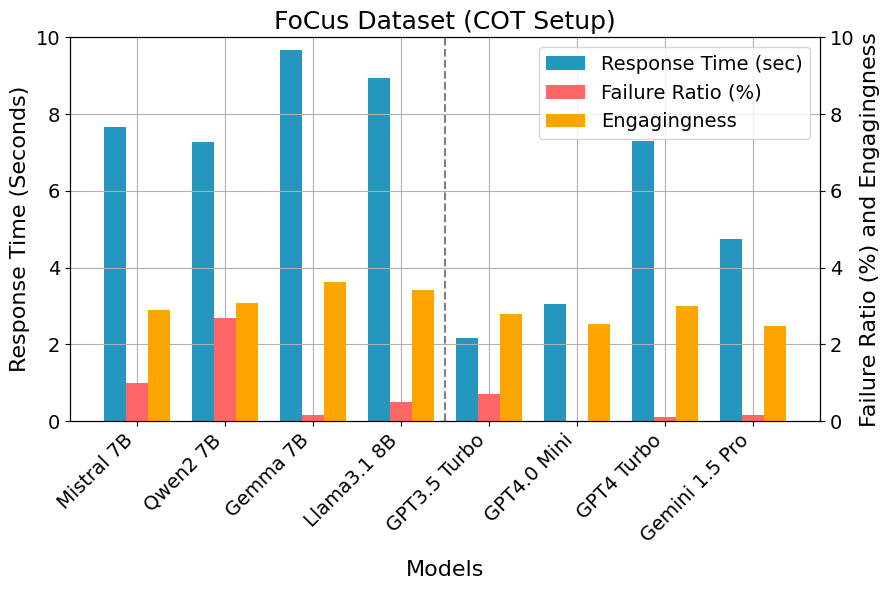

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for FoCus dataset (Vanilla and COT)
models = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'Llama3.1 8B', 'GPT3.5 Turbo', 'GPT4.0 Mini', 'GPT4 Turbo', 'Gemini 1.5 Pro']
response_time_vanilla = [4.39, 3.74, 5.17, 4.54, 1.30, 1.43, 3.32, 2.45]
failure_ratio_vanilla = [4.35, 5.1, 4.25, 4.5, 0.9, 0.86, 0.35, 0.248]
engagingness_vanilla = [1.54, 1.72, 2.1, 1.71, 2.31, 2.61, 2.2, 2.0]

response_time_cot = [7.67, 7.28, 9.68, 8.93, 2.16, 3.05, 7.29, 4.75]
failure_ratio_cot = [1.0, 2.7, 0.15, 0.5, 0.7, 0, 0.1, 0.17]
engagingness_cot = [2.89, 3.07, 3.63, 3.43, 2.8, 2.54, 3.0, 2.48]

# Function to create a grouped bar chart
def plot_grouped_bar_chart(response_time, failure_ratio, engagingness, title, ax, y_max_time, y_max_ratio):
    bar_width = 0.25
    index = np.arange(len(models))
    
    # Define specific colors for each metric
    color_response_time = '#2596be'  # Blue shade for response time
    color_failure_ratio = '#ff6666'  # Red shade for failure ratio
    color_engagingness = '#FFA500'   # Orange for engagingness
    
    # Plot response time on primary y-axis
    p1 = ax.bar(index - bar_width, response_time, bar_width, color=color_response_time, label='Response Time (sec)')
    
    # Create a secondary y-axis for failure ratio and engagingness
    ax2 = ax.twinx()
    p2 = ax2.bar(index, failure_ratio, bar_width, color=color_failure_ratio, label='Failure Ratio (%)')
    p3 = ax2.bar(index + bar_width, engagingness, bar_width, color=color_engagingness, label='Engagingness')
    
    # Add labels, title, and formatting
    ax.set_xlabel('Models', fontsize=16, labelpad=10)  # Add vertical margin with labelpad
    ax.set_ylabel('Response Time (Seconds)', fontsize=16)
    ax2.set_ylabel('Failure Ratio (%) and Engagingness', fontsize=16)
    ax.set_title(title, fontsize=18)
    
    ax.set_xticks(index)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=14)
    
    # Adjust the y-axes limits
    ax.set_ylim(0, y_max_time)  # Set y-axis limit for response time
    ax2.set_ylim(0, y_max_ratio)  # Set y-axis limit for failure ratio and engagingness
    ax.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    
    # Add grid to the background
    ax.grid(True)
    
    # Add vertical dashed lines to visually separate open-source and GPT models
    ax.axvline(x=3.5, color='gray', linestyle='--', lw=1.5)  # Line separating open-source and GPT models
    
    # Combine handles and labels for legend
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    
    # Add the combined legend
    ax.legend(handles, labels, loc='upper right', fontsize=14)

# Create subplots for Vanilla and COT setup with adjusted plot dimensions
fig_vanilla, ax_vanilla = plt.subplots(figsize=(9, 6))  # Wider X-axis, shorter plot height
fig_cot, ax_cot = plt.subplots(figsize=(9, 6))

# Vanilla setup chart with y_max_time for response time and y_max_ratio for failure ratio
plot_grouped_bar_chart(response_time_vanilla, failure_ratio_vanilla, engagingness_vanilla,
                       'FoCus Dataset (Vanilla Setup)', ax_vanilla, y_max_time=10, y_max_ratio=10)

# COT setup chart with y_max_time for response time and y_max_ratio for failure ratio
plot_grouped_bar_chart(response_time_cot, failure_ratio_cot, engagingness_cot,
                       'FoCus Dataset (COT Setup)', ax_cot, y_max_time=10, y_max_ratio=10)

# Adjust layout and display the charts
plt.tight_layout()

fig_vanilla.savefig('Figures/focus_vanilla_setup_grouped_plus_scaled.pdf', bbox_inches='tight')
fig_vanilla.savefig('Figures/focus_vanilla_setup_grouped_plus_scaled.png', bbox_inches='tight', dpi=300)
fig_cot.savefig('Figures/focus_cot_setup_grouped_plus_scaled.pdf', bbox_inches='tight')
fig_cot.savefig('Figures/focus_cot_setup_grouped_plus_scaled.png', bbox_inches='tight', dpi=300)


plt.show()


# Rada Plots

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a radar chart
def create_radar_chart(data_list, labels, categories, colors, filename):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
       
    N = len(data_list[0]) - 1  # Subtract 1 because the data sets are closed by repeating the first value
    angles = np.linspace(0, 2 * np.pi, N + 1)

    # Plot each data set
    for idx, data in enumerate(data_list):
        ax.fill(angles, data, color=colors[idx], alpha=0.3, label=labels[idx])
        ax.plot(angles, data, color=colors[idx], linewidth=1.2)  # Reduced polygon border width

    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=17)

    # Set range for radar chart
    ax.set_rlabel_position(30)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="black", size=14)
    plt.ylim(0, 100)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.tight_layout()

    # Set title and save the figure
    plt.savefig("Figures/" + filename, format="pdf")
    plt.savefig("Figures/" + filename.replace('.pdf', '.png'), format="png", dpi=300)

    # Show the plot
    plt.show()


In [17]:
# Define the aspects to be plotted (excluding Response Time and Failure Ratio)
categories = ['Fluency', 'Diversity', 'Coherence', 'Persona Coverage', 'Groundedness', 'Persona Consistency']

#               Bert-f1, Dist-2, UE-Score, P-Dist, Nat-Ground, C Score

colors = ['orange', 'blue', 'green', 'brown']

In [ ]:
# Data for open-source LLMs from the Vanilla setup on the FoCus dataset (scaled by 100)
data_mistral7b_vanilla = [0.48 * 100,   0.56 * 100,    0.21 * 100,     0.30 * 100,     0.45 * 100,      -0.23 * 100]
data_qwen2_7b_vanilla =  [0.42 * 100,   0.49 * 100,    0.17 * 100,     0.29 * 100,     0.43 * 100,      -0.31 * 100]
data_gemma_7b_vanilla =  [0.49 * 100,   0.56 * 100,    0.22 * 100,     0.39 * 100,     0.55 * 100,      -0.13 * 100]
data_llama13b_vanilla =  [0.47 * 100,   0.53 * 100,    0.17 * 100,     0.33 * 100,     0.42 * 100,      -0.22 * 100]

# Data for closed-source LLMs from the Vanilla setup on the FoCus dataset (scaled by 100)
data_gpt35_turbo_vanilla = [0.78 * 100,     0.90 * 100,     0.37 * 100,     0.51 * 100,     0.72 * 100,     0.26 * 100]
data_gpt4_mini_vanilla =   [0.80 * 100,     0.91 * 100,     0.35 * 100,     0.54 * 100,     0.72 * 100,     0.16 * 100]
data_gpt4_turbo_vanilla =  [0.84 * 100,     0.96 * 100,     0.39 * 100,     0.51 * 100,     0.66 * 100,     0.14 * 100]
data_gemini_1_5_vanilla =  [0.66 * 100,     0.75 * 100,     0.26 * 100,     0.45 * 100,     0.65 * 100,     0.04 * 100]

# Add the first value to each data set to close the radar chart 
data_mistral7b_vanilla += data_mistral7b_vanilla[:1]
data_qwen2_7b_vanilla += data_qwen2_7b_vanilla[:1]
data_gemma_7b_vanilla += data_gemma_7b_vanilla[:1]
data_llama13b_vanilla += data_llama13b_vanilla[:1]

data_gpt35_turbo_vanilla += data_gpt35_turbo_vanilla[:1]
data_gpt4_mini_vanilla += data_gpt4_mini_vanilla[:1]
data_gpt4_turbo_vanilla += data_gpt4_turbo_vanilla[:1]
data_gemini_1_5_vanilla += data_gemini_1_5_vanilla[:1]


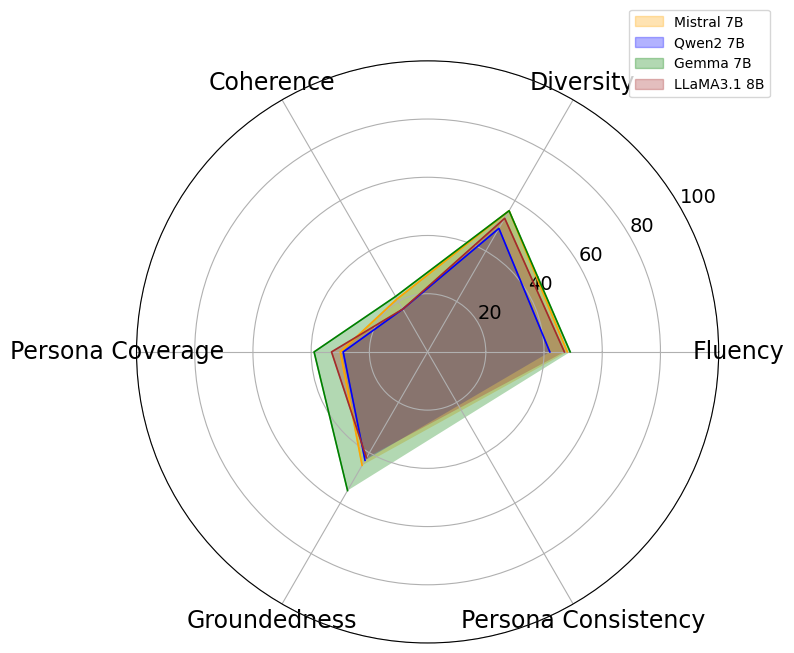

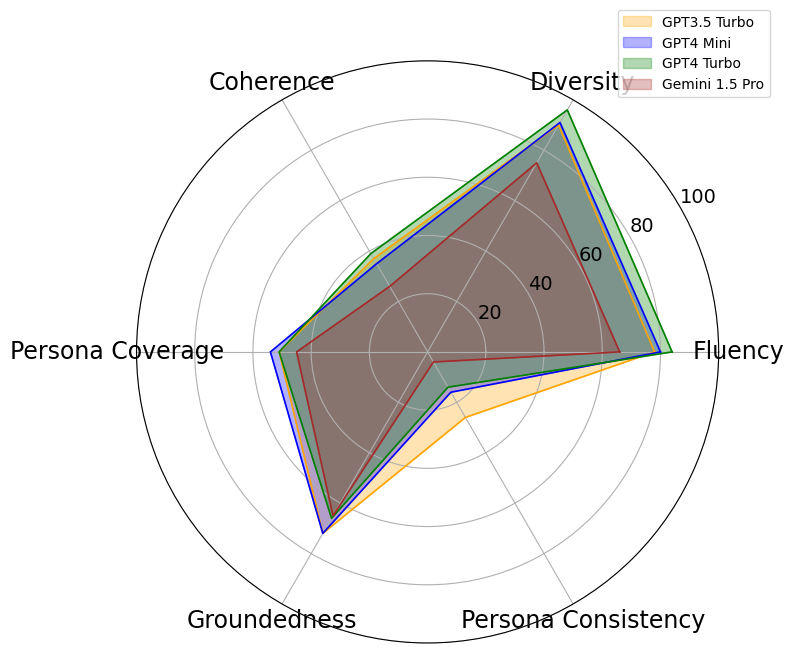

In [19]:
# Create radar chart for open-source LLMs in Vanilla setup
open_source_data_vanilla = [data_mistral7b_vanilla, data_qwen2_7b_vanilla, data_gemma_7b_vanilla ,data_llama13b_vanilla]
open_source_labels_vanilla = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B','LLaMA3.1 8B']
create_radar_chart(open_source_data_vanilla, open_source_labels_vanilla, categories, colors, "radar_vanilla_open_source.pdf")

# Create radar chart for closed-source LLMs in Vanilla setup
closed_source_data_vanilla = [data_gpt35_turbo_vanilla, data_gpt4_mini_vanilla, data_gpt4_turbo_vanilla, data_gemini_1_5_vanilla]
closed_source_labels_vanilla = ['GPT3.5 Turbo', 'GPT4 Mini', 'GPT4 Turbo', 'Gemini 1.5 Pro']
create_radar_chart(closed_source_data_vanilla, closed_source_labels_vanilla, categories, colors, "radar_vanilla_closed_source.pdf")


In [20]:
colors = ['red', 'grey', 'purple', 'maroon']

#Bert-f1, Dist-2, UE-Score, P-Dist, Nat-Ground, C Score

# Open-source LLMs  -   COT -    FoCus dataset (scaled by 100)
data_mistral7b_cot = [0.76 * 100,       0.88 * 100,     0.33 * 100,     0.53 * 100,     0.82 * 100,     0.41 * 100]
data_qwen2_7b_cot =  [0.62 * 100,       0.72 * 100,     0.36 * 100,     0.43 * 100,     0.70 * 100,     0.21 * 100]
data_gemma_7b_cot =  [0.72 * 100,       0.83 * 100,     0.26 * 100,     0.53 * 100,     0.81 * 100,     0.42 * 100]
data_llama13b_cot =  [0.80 * 100,       0.93 * 100,     0.33 * 100,     0.59 * 100,     0.89 * 100,     0.54 * 100]

# Closed-source LLMs  -   COT -    FoCus dataset (scaled by 100)
data_gpt35_turbo_cot = [0.80 * 100,     0.92 * 100,     0.41 * 100,     0.48 * 100,     0.81 * 100,     0.40 * 100]
data_gpt4_mini_cot =   [0.86 * 100,     0.99 * 100,     0.45 * 100,     0.57 * 100,     0.84 * 100,     0.30 * 100]
data_gpt4_turbo_cot =  [0.86 * 100,     0.98 * 100,     0.48 * 100,     0.52 * 100,     0.70 * 100,     0.21 * 100]
data_gemini_1_5_cot =  [0.71 * 100,     0.82 * 100,     0.32 * 100,     0.48 * 100,     0.70 * 100,     0.15 * 100]


# Add the first value to each data set to close the radar chart
data_mistral7b_cot += data_mistral7b_cot[:1]
data_qwen2_7b_cot += data_qwen2_7b_cot[:1]
data_gemma_7b_cot += data_gemma_7b_cot[:1]
data_llama13b_cot += data_llama13b_cot[:1]

data_gpt35_turbo_cot += data_gpt35_turbo_cot[:1]
data_gpt4_mini_cot += data_gpt4_mini_cot[:1]
data_gpt4_turbo_cot += data_gpt4_turbo_cot[:1]
data_gemini_1_5_cot += data_gemini_1_5_cot[:1]

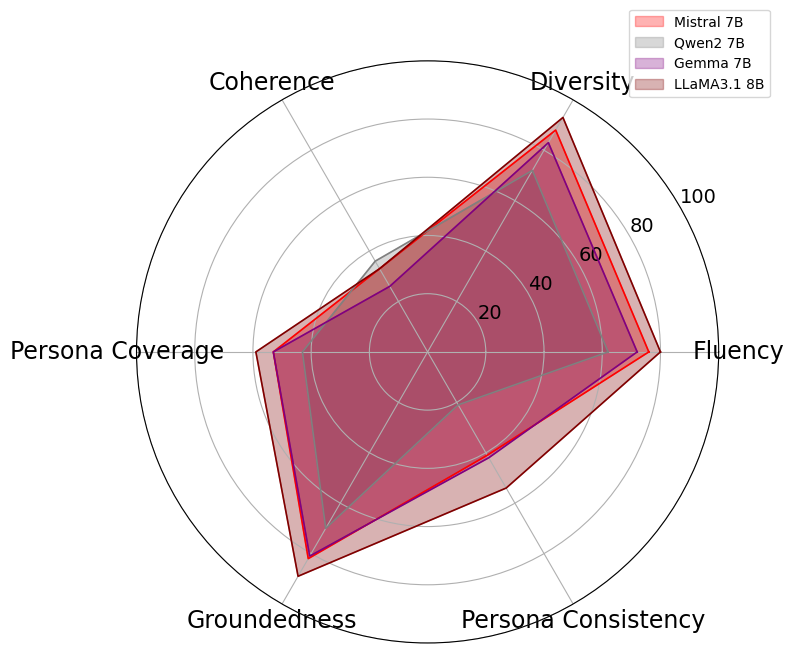

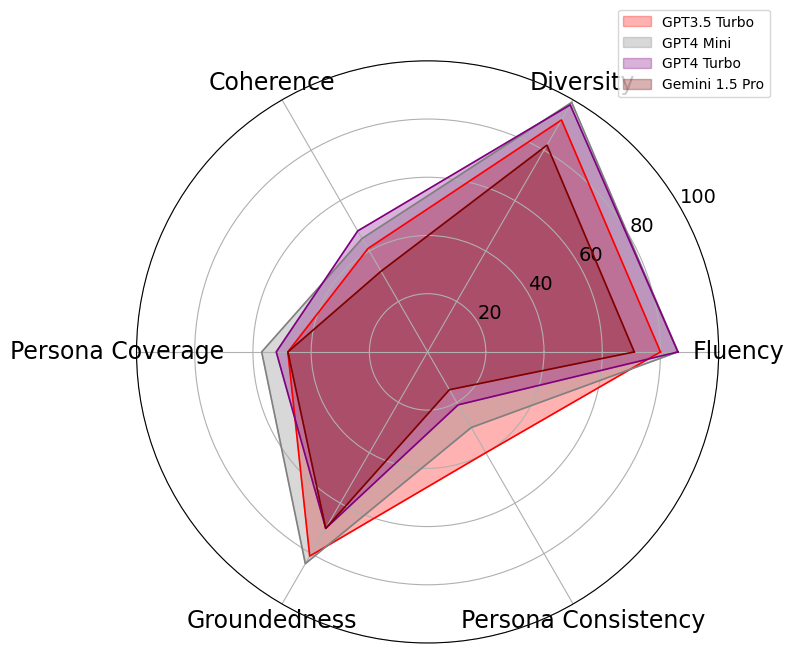

In [21]:
# Create radar chart for open-source LLMs in Vanilla setup
open_source_data_COT = [data_mistral7b_cot, data_qwen2_7b_cot, data_gemma_7b_cot, data_llama13b_cot]
open_source_labels_COT = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'LLaMA3.1 8B']
create_radar_chart(open_source_data_COT, open_source_labels_COT, categories, colors, "radar_cot_open_source.pdf")

# Create radar chart for closed-source LLMs in Vanilla`` setup
closed_source_data_COT = [data_gpt35_turbo_cot, data_gpt4_mini_cot, data_gpt4_turbo_cot, data_gemini_1_5_cot]
closed_source_labels_COT = ['GPT3.5 Turbo', 'GPT4 Mini', 'GPT4 Turbo', 'Gemini 1.5 Pro']
create_radar_chart(closed_source_data_COT, closed_source_labels_COT, categories, colors, "radar_cot_closed_source.pdf")


# Ranking

In [7]:
# Models
models = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'Llama 13B',
          'GPT-3.5 Turbo', 'GPT-4.0 Mini', 'GPT-4 Turbo', 'Gemini 1.5 Pro']

# Failure ratios
failure_ratio_vanilla = [4.35, 5.1, 4.25, 4.5, 0.9, 0.86, 0.35, 0.248]
failure_ratio_cot     = [1.0, 2.7, 0.15, 0.5, 0.7, 0, 0.1, 0.17]

In [8]:
def calculate_instructability_score(failure_ratios):
    max_failure = max(failure_ratios)
    return [round((max_failure - ratio) / max_failure, 2) for ratio in failure_ratios]


# Usage
instructability_scores_vanilla = calculate_instructability_score(failure_ratio_vanilla)
print('Instructability_Vanilla:', instructability_scores_vanilla)

# Usage
instructability_scores_cot = calculate_instructability_score(failure_ratio_cot)
print('Instructability_COT:', instructability_scores_cot)


Instructability_Vanilla: [0.15, 0.0, 0.17, 0.12, 0.82, 0.83, 0.93, 0.95]
Instructability_COT: [0.63, 0.0, 0.94, 0.81, 0.74, 1.0, 0.96, 0.94]


In [ ]:
import numpy as np
import pandas as pd

models = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'Llama-3.1 8B', 'GPT-3.5 Turbo', 'GPT-4.0 Mini', 'GPT-4 Turbo', 'Gemini 1.5 Pro']

metrics = ['Fluency', 'Diversity', 'Coherence', 'Persona Coverage', 'Groundedness', 'Persona Consistency', 'Instructability']

data_vanilla = {
    "Mistral 7B":       [48, 56, 21, 30, 45, -23, 0.15],
    "Qwen2 7B":         [42, 49, 17, 29, 43, -31, 0.0],
    "Gemma 7B":         [49, 56, 22, 39, 55, -13, 0.17],
    "Llama-3.1 8B":     [47, 53, 17, 33, 42, -22, 0.12],
    "GPT-3.5 Turbo":    [78, 90, 37, 51, 72, 26, 0.82],
    "GPT-4.0 Mini":     [80, 91, 35, 54, 72, 16, 0.83],
    "GPT-4 Turbo":      [84, 96, 39, 51, 66, 14, 0.93],
    "Gemini 1.5 Pro":   [66, 75, 26, 45, 65, 4, 0.95],
}

data_cot = {
    "Mistral 7B":       [76, 88, 33, 53, 82, 41, 0.63],
    "Qwen2 7B":         [62, 72, 36, 43, 70, 21, 0.0],
    "Gemma 7B":         [72, 83, 26, 53, 81, 42, 0.94],
    "Llama-3.1 8B":     [80, 93, 33, 59, 89, 54, 0.81],
    "GPT-3.5 Turbo":    [80, 92, 41, 48, 81, 40, 0.74],
    "GPT-4.0 Mini":     [86, 99, 45, 57, 84, 30, 1.0],
    "GPT-4 Turbo":      [86, 98, 48, 52, 70, 21, 0.96],
    "Gemini 1.5 Pro":   [71, 82, 32, 48, 70, 15, 0.94],
}

In [13]:
# Build DataFrames
vanilla_df = pd.DataFrame.from_dict(data_vanilla, orient="index", columns=metrics).loc[models]
cot_df     = pd.DataFrame.from_dict(data_cot, orient="index", columns=metrics).loc[models]

# Drop Fluency and Diversity
vanilla_df = vanilla_df.drop(columns=["Fluency", "Diversity"])
cot_df     = cot_df.drop(columns=["Fluency", "Diversity"])

# Rankings
vanilla_mean = vanilla_df.mean(axis=1).round(2).sort_values(ascending=False)
cot_mean     = cot_df.mean(axis=1).round(2).sort_values(ascending=False)

step1 = pd.DataFrame({"Model": vanilla_mean.index, "Vanilla Score": vanilla_mean.values})
step1["Rank (Vanilla)"] = range(1, len(step1)+1)

step2 = pd.DataFrame({"Model": cot_mean.index, "COT Score": cot_mean.values})
step2["Rank (COT)"] = range(1, len(step2)+1)

# Print tables with tabulate
print("\n=== Vanilla Ranking ===")
print(tabulate(step1, headers="keys", tablefmt="pretty", showindex=False))

print("\n=== COT Ranking ===")
print(tabulate(step2, headers="keys", tablefmt="pretty", showindex=False))


=== Vanilla Ranking ===
+----------------+---------------+----------------+
|     Model      | Vanilla Score | Rank (Vanilla) |
+----------------+---------------+----------------+
| GPT-3.5 Turbo  |     37.36     |       1        |
|  GPT-4.0 Mini  |     35.57     |       2        |
|  GPT-4 Turbo   |     34.19     |       3        |
| Gemini 1.5 Pro |     28.19     |       4        |
|    Gemma 7B    |     20.63     |       5        |
|   Mistral 7B   |     14.63     |       6        |
|  Llama-3.1 8B  |     14.02     |       7        |
|    Qwen2 7B    |     11.6      |       8        |
+----------------+---------------+----------------+

=== COT Ranking ===
+----------------+-----------+------------+
|     Model      | COT Score | Rank (COT) |
+----------------+-----------+------------+
|  Llama-3.1 8B  |   47.16   |     1      |
|  GPT-4.0 Mini  |   43.4    |     2      |
| GPT-3.5 Turbo  |   42.15   |     3      |
|   Mistral 7B   |   41.93   |     4      |
|    Gemma 7B    |   4